<b>Описание/Пошаговая инструкция выполнения домашнего задания:</b><br>
Выберите один из предложенных ниже датасетов (или предложите свой) и попробуйте воспользоваться методами автоматического построения моделей с помощью H2O AutoML для получения решения поставленной задачи. Сравните точностные характеристики обученной метамодели с любой парой моделей "из коробки" (т.е. выбранных вами вручную под конкретную задачу без дополнительной настройки гиперпараметров). Дополнительно сравните результаты с моделью выбранной с помощью библиотеки TPOT.

# Выполнение ДЗ

## Библиотеки

In [123]:
# библиотеки
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.exceptions import NotFittedError
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from h2o.sklearn import H2OAutoMLClassifier
import h2o

## Подготовка данных

In [ ]:
raw_data = "RetailMart.xlsx"
!wget -r https://github.com/ankislyakov/data/raw/main/RetailMart.xlsx -O $raw_data

data = pd.read_excel(raw_data)

data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[target])
print(data_train.shape, data_test.shape)

In [ ]:
target_col = ['PREGNANT']
categorical_col = ['Implied Gender', 'Home/Apt/ PO Box']
numeric_col = [
    'Pregnancy Test',
    'Birth Control',
    'Feminine Hygiene',
    'Folic Acid',
    'Prenatal Vitamins',
    'Prenatal Yoga',
    'Body Pillow',
    'Ginger Ale',
    'Sea Bands',
    'Stopped buying ciggies',
    'Cigarettes',
    'Smoking Cessation',
    'Stopped buying wine',
    'Wine',
    'Maternity Clothes'
]

## Создание моделей вручную

### LogisticRegression

In [72]:
# собираем конвейер
data_transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_col),
        ("numeric_col", "passthrough", numeric_col)
    ]
)

preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', LogisticRegression())])
classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Implied '
                                                                    'Gender',
                                                                    'Home/Apt/ '
                                                                    'PO Box']),
                                                                  ('numeric_col',
                                                                   'passthrough',
                                                                   ['Pregnancy '
                                                                    'Test',
                                                                    'Birth '
                                                                    'Control',
                                                                    'Feminine '
                                                                    'Hygiene',
                                                                    'Folic '
                                                                    'Acid',
                                                                    'Prenatal '
                                                                    'Vitamins',
                                                                    'Prenatal '
                                                                    'Yoga',
                                                                    'Body '
                                                                    'Pillow',
                                                                    'Ginger '
                                                                    'Ale',
                                                                    'Sea Bands',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'ciggies',
                                                                    'Cigarettes',
                                                                    'Smoking '
                                                                    'Cessation',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'wine',
                                                                    'Wine',
                                                                    'Maternity '
                                                                    'Clothes'])]))])),
                ('classifier', LogisticRegression())])

In [75]:
# обучаем, предсказываем, проверяем
classifier_pipline.fit(data_train[categorical_col+numeric_col], data_train[target_col])

preds = classifier_pipline.predict(data_test[categorical_col+numeric_col])

print(classification_report(data_test[target_col], preds))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       100
           1       0.83      0.80      0.82       100

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.82      0.82      0.82       200



/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### DecisionTreeClassifier

In [77]:
# собираем конвейер
data_transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_col),
        ("numeric_col", "passthrough", numeric_col)
    ]
)
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', DecisionTreeClassifier())])
classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Implied '
                                                                    'Gender',
                                                                    'Home/Apt/ '
                                                                    'PO Box']),
                                                                  ('numeric_col',
                                                                   'passthrough',
                                                                   ['Pregnancy '
                                                                    'Test',
                                                                    'Birth '
                                                                    'Control',
                                                                    'Feminine '
                                                                    'Hygiene',
                                                                    'Folic '
                                                                    'Acid',
                                                                    'Prenatal '
                                                                    'Vitamins',
                                                                    'Prenatal '
                                                                    'Yoga',
                                                                    'Body '
                                                                    'Pillow',
                                                                    'Ginger '
                                                                    'Ale',
                                                                    'Sea Bands',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'ciggies',
                                                                    'Cigarettes',
                                                                    'Smoking '
                                                                    'Cessation',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'wine',
                                                                    'Wine',
                                                                    'Maternity '
                                                                    'Clothes'])]))])),
                ('classifier', DecisionTreeClassifier())])

In [78]:
# обучаем, предсказываем, проверяем
classifier_pipline.fit(data_train[categorical_col+numeric_col], data_train[target_col])

preds = classifier_pipline.predict(data_test[categorical_col+numeric_col])

print(classification_report(data_test[target_col], preds))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       100
           1       0.81      0.75      0.78       100

    accuracy                           0.79       200
   macro avg       0.79      0.78      0.78       200
weighted avg       0.79      0.79      0.78       200



## Создание моделей с помощью H2O AutoML

In [124]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,30 mins 16 secs
H2O_cluster_timezone:,Asia/Irkutsk
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_slawa_ocp4dv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.881 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [125]:
# объявляем класс с набором моделей
aml_c = H2OAutoMLClassifier(seed=1, max_runtime_secs=30)

In [119]:
# собираем конвейер
data_transformer = ColumnTransformer(
    [
        ("onehot", OneHotEncoder(handle_unknown="ignore"), categorical_col),
        ("numeric_col", "passthrough", numeric_col)
    ]
)
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

aml_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifierAutoML', aml_c)])
aml_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Implied '
                                                                    'Gender',
                                                                    'Home/Apt/ '
                                                                    'PO Box']),
                                                                  ('numeric_col',
                                                                   'passthrough',
                                                                   ['Pregnancy '
                                                                    'Test',
                                                                    'Birth '
                                                                    'Control',
                                                                    'Feminine '
                                                                    'Hygiene',
                                                                    'Folic '
                                                                    'Acid',
                                                                    'Prenatal '
                                                                    'Vitamins',
                                                                    'Prenatal '
                                                                    'Yoga',
                                                                    'Body '
                                                                    'Pillow',
                                                                    'Ginger '
                                                                    'Ale',
                                                                    'Sea Bands',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'ciggies',
                                                                    'Cigarettes',
                                                                    'Smoking '
                                                                    'Cessation',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'wine',
                                                                    'Wine',
                                                                    'Maternity '
                                                                    'Clothes'])]))])),
                ('classifierAutoML',
                 H2OAutoMLClassifier(max_runtime_secs=30, seed=1))])

In [120]:
# обучаем
aml_pipline.fit(data_train[categorical_col+numeric_col], data_train[target_col])

Parse progress: |

████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['Implied '
                                                                    'Gender',
                                                                    'Home/Apt/ '
                                                                    'PO Box']),
                                                                  ('numeric_col',
                                                                   'passthrough',
                                                                   ['Pregnancy '
                                                                    'Test',
                                                                    'Birth '
                                                                    'Control',
                                                                    'Feminine '
                                                                    'Hygiene',
                                                                    'Folic '
                                                                    'Acid',
                                                                    'Prenatal '
                                                                    'Vitamins',
                                                                    'Prenatal '
                                                                    'Yoga',
                                                                    'Body '
                                                                    'Pillow',
                                                                    'Ginger '
                                                                    'Ale',
                                                                    'Sea Bands',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'ciggies',
                                                                    'Cigarettes',
                                                                    'Smoking '
                                                                    'Cessation',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'wine',
                                                                    'Wine',
                                                                    'Maternity '
                                                                    'Clothes'])]))])),
                ('classifierAutoML',
                 H2OAutoMLClassifier(max_runtime_secs=30, seed=1))])

In [121]:
# проверяем
preds = aml_pipline.predict(data_test[categorical_col+numeric_col])
print(classification_report(data_test[target_col], preds))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       100
           1       0.78      0.87      0.82       100

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [122]:
# смотрим на лучшие результаты
aml_pipline[1].estimator.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid_1_AutoML_6_20240330_182749_model_7,0.901522,0.400136,0.911143,0.18875,0.358091,0.128229
GBM_grid_1_AutoML_6_20240330_182749_model_3,0.900503,0.394856,0.910929,0.17625,0.356025,0.126754
GLM_1_AutoML_6_20240330_182749,0.899084,0.392811,0.907724,0.1875,0.3552,0.126167
StackedEnsemble_BestOfFamily_4_AutoML_6_20240330_182749,0.897934,0.395921,0.906715,0.18125,0.356832,0.127329
XGBoost_grid_1_AutoML_6_20240330_182749_model_13,0.897816,0.398765,0.90761,0.16875,0.357915,0.128103
GBM_grid_1_AutoML_6_20240330_182749_model_9,0.897725,0.397719,0.908552,0.17125,0.357663,0.127923
StackedEnsemble_BestOfFamily_1_AutoML_6_20240330_182749,0.897509,0.393779,0.906788,0.17625,0.355667,0.126499
GBM_grid_1_AutoML_6_20240330_182749_model_10,0.897441,0.401133,0.906456,0.1825,0.358616,0.128606
GBM_grid_1_AutoML_6_20240330_182749_model_1,0.897388,0.40328,0.905522,0.1825,0.359925,0.129546
GBM_grid_1_AutoML_6_20240330_182749_model_15,0.896897,0.403108,0.906865,0.18375,0.360748,0.130139


In [129]:
aml_pipline[1].estimator.leader

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_6_20240330_182749_model_7


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    74                 74                          11193                  3            3            3             6             8             7.37838

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11547903095232867
RMSE: 0.3398220577777856
LogLoss: 0.36661393864751096
Mean Per-Class Error: 0.16375
AUC: 0.9229718750000001
AUCPR: 0.932194791601269
Gini: 0.8459437500000002

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40657116193525805
       0    1    Error    Rate
-----  ---  ---  -------  -------------
0      329  71   0.1775   (71.0/400.0)
1      60   340  0.15     (60.0/400.0)
Total  389  411  0.1638   (131.0/800.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.406571     0.838471  247
max f2                       0.343004     0.889145  260
max f0point5                 0.656784     0.884375  206
max accuracy                 0.517304     0.84625   231
max precision                0.99699      1         0
max recall                   0.125398     1         303
max specificity              0.99699      1         0
max absolute_mcc             0.517304     0.700158  231
max min_per_class_accuracy   0.415054     0.8225    244
max mean_per_class_accuracy  0.517304     0.84625   231
max tns                      0.99699      400       0
max fns                      0.99699      399       0
max fps                      0.0170405    400       350
max tps                      0.125398     400       303
max tnr                      0.99699      1         0
max fnr                      0.99699      0.9975    0
max fpr                      0.0170405    1         350
max tpr                      0.125398     1         303

Gains/Lift Table: Avg response rate: 50,00 %, avg score: 50,14 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01                        0.993831           2         2                  1                0.995498   1                           0.995498            0.02            0.02                       100       100                0.02
2        0.02125                     0.990072           2         2                  1                0.991738   1                           0.993507            0.0225          0.0425                     100       100                0.0425
3        0.03                        0.985112           2         2                  1                0.987633   1                           0.991794            0.0175          0.06                       100       100                0.06
4        0.04                        0.983236           2         2                  1                0.984189   1                           0.989893            0.02            0.08                       100       100                0.08
5        0.05                        0.979574           2         2                  1                0.981378   1                           0.98819             0.02            

# Мои эксперименты

## Посмотрим на данные

In [51]:
# Сменим рабочую дирректорию для удобства
import os
os.chdir('/home/slawa/HDD/my_scripts/my_otus/ML_advanced/lesson_5/hw')

In [52]:
# библиотеки
import pandas as pd
import numpy as np

In [53]:
# загрузка данных
raw_data = "RetailMart.xlsx"
!wget -r https://github.com/ankislyakov/data/raw/main/RetailMart.xlsx -O $raw_data

ПРЕДУПРЕЖДЕНИЕ: комбинирование параметра -O с -r или -p означает, что весь
загруженные данные будут помещены в один файл.

--2024-03-30 17:19:33--  https://github.com/ankislyakov/data/raw/main/RetailMart.xlsx
Загружен сертификат CA «/etc/ssl/certs/ca-certificates.crt»
Распознаётся github.com (github.com)… 140.82.121.3
Подключение к github.com (github.com)|140.82.121.3|:443... соединение установлено.


HTTP-запрос отправлен. Ожидание ответа… 302 Found
Адрес: https://raw.githubusercontent.com/ankislyakov/data/main/RetailMart.xlsx [переход]
--2024-03-30 17:19:34--  https://raw.githubusercontent.com/ankislyakov/data/main/RetailMart.xlsx
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 70664 (69K) [application/octet-stream]
Сохранение в: «RetailMart.xlsx»

RetailMart.xlsx     100%[===================>]  69,01K   377KB/s    за 0,2s    

2024-03-30 17:19:34 (377 KB/s) - «RetailMart.xlsx» сохранён [70664/70664]

ЗАВЕРШЕНО --2024-03-30 17:19:34--
Общее время: 1,4s
Загружено: 1 файлов, 69K за 0,2s (377 KB/s)


In [54]:
data = pd.read_excel(raw_data)
data

/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Implied Gender,Home/Apt/ PO Box,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Unnamed: 17,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
996,F,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
997,M,H,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
998,U,H,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0


In [55]:
print(*data.columns, sep="\n")

Implied Gender
Home/Apt/ PO Box
Pregnancy Test
Birth Control
Feminine Hygiene
Folic Acid
Prenatal Vitamins
Prenatal Yoga
Body Pillow
Ginger Ale
Sea Bands
Stopped buying ciggies
Cigarettes
Smoking Cessation
Stopped buying wine
Wine
Maternity Clothes
Unnamed: 17
PREGNANT


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Implied Gender          1000 non-null   object 
 1   Home/Apt/ PO Box        1000 non-null   object 
 2   Pregnancy Test          1000 non-null   int64  
 3   Birth Control           1000 non-null   int64  
 4   Feminine Hygiene        1000 non-null   int64  
 5   Folic Acid              1000 non-null   int64  
 6   Prenatal Vitamins       1000 non-null   int64  
 7   Prenatal Yoga           1000 non-null   int64  
 8   Body Pillow             1000 non-null   int64  
 9   Ginger Ale              1000 non-null   int64  
 10  Sea Bands               1000 non-null   int64  
 11  Stopped buying ciggies  1000 non-null   int64  
 12  Cigarettes              1000 non-null   int64  
 13  Smoking Cessation       1000 non-null   int64  
 14  Stopped buying wine     1000 non-null   i

In [57]:
data.drop(['Unnamed: 17'], axis=1, inplace=True)

In [58]:
data["Implied Gender"].unique()

array(['M', 'U', 'F'], dtype=object)

In [59]:
data["Home/Apt/ PO Box"].unique()

array(['A', 'H', 'P'], dtype=object)

In [60]:
def bin_encoding(data:pd.core.frame.DataFrame,
                 column_name:str,
                 zero_class:str | None = None) -> pd.core.frame.DataFrame:
    '''
    Кодирование катигориальных признаков в двоичную систему
    '''
    data = data.copy()
    if column_name not in data.columns:
        return data
    classes = data[column_name].unique()
    if zero_class:
        classes = classes[classes != zero_class]
    for num, cl in enumerate(classes):
        new_column_name = column_name + '_' + str(num)
        data[new_column_name] = 0
        data.loc[data[column_name] == cl, new_column_name] = 1
    data.drop([column_name], axis=1, inplace=True)
    return data

def drop_untitled(data:pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
    '''
    удаление столбцов с именем Unnamed
    '''
    columns_name = data.columns
    mask = list(map(lambda x: 'Unnamed' not in x, columns_name))
    return data[columns_name[mask]]



In [61]:
drop_untitled(data)

,Implied Gender,Home/Apt/ PO Box,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,F,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,M,H,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
998,U,H,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Implied Gender          1000 non-null   object
 1   Home/Apt/ PO Box        1000 non-null   object
 2   Pregnancy Test          1000 non-null   int64 
 3   Birth Control           1000 non-null   int64 
 4   Feminine Hygiene        1000 non-null   int64 
 5   Folic Acid              1000 non-null   int64 
 6   Prenatal Vitamins       1000 non-null   int64 
 7   Prenatal Yoga           1000 non-null   int64 
 8   Body Pillow             1000 non-null   int64 
 9   Ginger Ale              1000 non-null   int64 
 10  Sea Bands               1000 non-null   int64 
 11  Stopped buying ciggies  1000 non-null   int64 
 12  Cigarettes              1000 non-null   int64 
 13  Smoking Cessation       1000 non-null   int64 
 14  Stopped buying wine     1000 non-null   int64 
 15  Wine 

<Axes: >

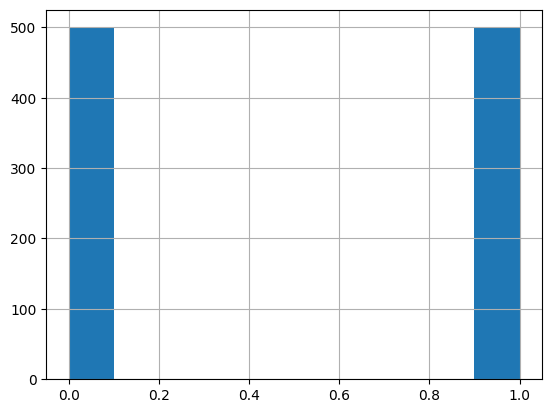

In [100]:
data['PREGNANT'].hist()

## Собираем pipeline

In [63]:
# библиотеки
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.exceptions import NotFittedError
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.metrics import classification_report

In [64]:
# загрузка данных
raw_data = "RetailMart.xlsx"
!wget -r https://github.com/ankislyakov/data/raw/main/RetailMart.xlsx -O $raw_data

ПРЕДУПРЕЖДЕНИЕ: комбинирование параметра -O с -r или -p означает, что весь
загруженные данные будут помещены в один файл.

--2024-03-30 17:19:35--  https://github.com/ankislyakov/data/raw/main/RetailMart.xlsx
Загружен сертификат CA «/etc/ssl/certs/ca-certificates.crt»
Распознаётся github.com (github.com)… 140.82.121.3
Подключение к github.com (github.com)|140.82.121.3|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 

302 Found
Адрес: https://raw.githubusercontent.com/ankislyakov/data/main/RetailMart.xlsx [переход]
--2024-03-30 17:19:35--  https://raw.githubusercontent.com/ankislyakov/data/main/RetailMart.xlsx
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 70664 (69K) [application/octet-stream]
Сохранение в: «RetailMart.xlsx»

RetailMart.xlsx     100%[===================>]  69,01K   397KB/s    за 0,2s    

2024-03-30 17:19:36 (397 KB/s) - «RetailMart.xlsx» сохранён [70664/70664]

ЗАВЕРШЕНО --2024-03-30 17:19:36--
Общее время: 1,0s
Загружено: 1 файлов, 69K за 0,2s (397 KB/s)


In [65]:
data = pd.read_excel(raw_data)
data

/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Implied Gender,Home/Apt/ PO Box,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Unnamed: 17,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
996,F,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
997,M,H,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0
998,U,H,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0


In [66]:
target_col = ['PREGNANT']
categorical_col = ['Implied Gender', 'Home/Apt/ PO Box']
numeric_col = [
    'Pregnancy Test',
    'Birth Control',
    'Feminine Hygiene',
    'Folic Acid',
    'Prenatal Vitamins',
    'Prenatal Yoga',
    'Body Pillow',
    'Ginger Ale',
    'Sea Bands',
    'Stopped buying ciggies',
    'Cigarettes',
    'Smoking Cessation',
    'Stopped buying wine',
    'Wine',
    'Maternity Clothes'
]

In [67]:
data_train, data_test = train_test_split(data, test_size=0.2, stratify=data[target])
print(data_train.shape, data_test.shape)

(800, 19) (200, 19)


In [68]:
class CustomCategoricallTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, column_name:str, zero_class:str):
        self.column_name = column_name
        self.zero_class = zero_class
        self.__classes = None
        self.__data = None

    def fit(self, X:pd.DataFrame, y=None):
        self.__data, self.__classes = self.__bin_encoding(
            X, self.column_name, self.zero_class
        )
        return self

    def transform(self, X:pd.DataFrame):
        if self.__data is None:
            raise NotFittedError()
        result, _ = self.__bin_encoding(
            X, self.column_name, self.zero_class
        )
        return result

    def inverse_transform(self, X:pd.DataFrame):
        result = self.__bin_decoding(
            X, self.column_name,
            self.zero_class, self.__classes
        )
        return result

    def __bin_encoding(self, 
                       data: pd.DataFrame, 
                       column_name: str,
                       zero_class: str) -> pd.DataFrame:
        data = data.copy()
        if column_name not in data.columns:
            raise KeyError(f'{column_name} is not found')
        classes = data[column_name].unique()
        classes = classes[classes != zero_class]
        for num, cl in enumerate(classes):
            new_column_name = column_name + '_' + str(num)
            data[new_column_name] = 0
            data.loc[data[column_name] == cl, new_column_name] = 1
        data.drop([column_name], axis=1, inplace=True)
        return data, classes

    def __bin_decoding(self, 
                       data: pd.DataFrame, 
                       column_name: str,
                       zero_class: str,
                       classes: np.ndarray) -> pd.DataFrame:
        
        data = data.copy()
        data[column_name] = ''
        for num, cl in enumerate(classes):
            new_column_name = column_name + '_' + str(num)
            if new_column_name not in data.columns:
                raise KeyError(f'{column_name} is not found')
            data.loc[data[new_column_name] == 1, column_name] = cl
        data.loc[data[column_name] == '', column_name] = zero_class
        return data


In [69]:
data_transformer = ColumnTransformer(
    [
        ("gender_col", CustomCategoricallTransformer('Implied Gender', 'U'), [categorical_col[0]]),
        ("adress_col", CustomCategoricallTransformer('Home/Apt/ PO Box', 'P'), [categorical_col[1]]),
        ("numeric_col", "passthrough", numeric_col)
    ]
)
preprocessor = Pipeline(steps=[("data_transformer", data_transformer)])

classifier_pipline = Pipeline(
    steps=[('preprocessor', preprocessor),
           ('classifier', LogisticRegression())])
classifier_pipline

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('data_transformer',
                                  ColumnTransformer(transformers=[('gender_col',
                                                                   CustomCategoricallTransformer(column_name='Implied '
                                                                                                             'Gender',
                                                                                                 zero_class='U'),
                                                                   ['Implied '
                                                                    'Gender']),
                                                                  ('adress_col',
                                                                   CustomCategoricallTransformer(column_name='Home/Apt/ '
                                                                                                             'PO '
                                                                                                             'Box',
                                                                                                 zero_class='P'),
                                                                   ['Home/Apt/ '
                                                                    'PO Box']),
                                                                  ('numeric_col',
                                                                   'passthrough',
                                                                   ['Pregnancy '
                                                                    'Test',
                                                                    'Birth '
                                                                    'Control',
                                                                    'Feminine '
                                                                    'Hygiene',
                                                                    'Folic '
                                                                    'Acid',
                                                                    'Prenatal '
                                                                    'Vitamins',
                                                                    'Prenatal '
                                                                    'Yoga',
                                                                    'Body '
                                                                    'Pillow',
                                                                    'Ginger '
                                                                    'Ale',
                                                                    'Sea Bands',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'ciggies',
                                                                    'Cigarettes',
                                                                    'Smoking '
                                                                    'Cessation',
                                                                    'Stopped '
                                                                    'buying '
                                                                    'wine',
                                                                    'Wine',
                                                                    'Maternity '
                                                                    'Clothes'])]))])),
                ('classifier', LogisticRegression())])

In [70]:
classifier_pipline.fit(data_train[categorical_col+numeric_col], data_train[target_col])

preds = classifier_pipline.predict(data_test[categorical_col+numeric_col])

print(classification_report(data_test[target_col], preds))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.84      0.81      0.82       100

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



/home/slawa/HDD/my_scripts/my_otus/ML_advanced/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
